# 산업별 대장주 리스트
- 기간: 2020 ~ 2023
- 방법: 월별 산업별 대장주 리스트 
- 내용: 반도체, 2차전지, 바이오, 로봇, AI 플랫폼

In [8]:
import numpy as np 
import pandas as pd


import matplotlib.pyplot as plt 
plt.rcParams['font.family'] = 'D2Coding'
import seaborn as sns 


from tqdm import tqdm
from datetime import datetime
from dateutil.relativedelta import relativedelta


import warnings 
warnings.filterwarnings(action='ignore')

In [9]:
import sys 
sys.path.append("../")

from asset.common.utils import reset_seeds, load_stock, load_corps

# global variables

In [10]:
import easydict
args = easydict.EasyDict()

args.SEED = 42

args.df_corps_path = '../data/meta/stock_corps.csv'
args.market_cap_path = '../data/market_cap/{year}_{month}.csv'

# 회사 메타

In [11]:
df_corps = load_corps(args.df_corps_path)
df_corps.head(2)

(2494, 13)


,corp_code,corp_name,stock_code,corp_cls,corp_cls_nm,sector,product,industry_wics_ss_nm,industry_wics_ss_cd,industry_wics_ms_cd,industry_wics_ms_nm,industry_wics_ls_cd,industry_wics_ls_nm
0,956028,엑세스바이오,950130,K,kosdaq,의료용품 및 기타 의약 관련제품 제조업,"말라리아 진단키트(RDT), HIV 진단키트(RDT)",생명과학도구및서비스,352030,3520,제약과생물공학,35,건강관리
1,783246,글로벌에스엠,900070,K,kosdaq,기타 금융업,"자회사 제품 : IT기기용 정밀 화스너부품(스크류, 샤프트, 스프링)",자동차부품,251010,2510,자동차와부품,25,경기관련소비재


# 월별 시가총액

In [12]:
years = ["200"+str(month) if len(str(month))== 1 else "20"+str(month) for month in range(20,24)]
months = ['0'+str(month) if len(str(month))== 1 else str(month) for month in range(1,13) ]

In [24]:
df_dict = {}

for year in tqdm(years):
    for month in months:
        try:
            market_cap_path = args.market_cap_path.format(year=year, month=month)
            df_dtype = {
                'stock_code': 'object'
            }
            _df = pd.read_csv(market_cap_path, dtype=df_dtype)
            _df = pd.merge(_df, df_corps[['stock_code', 'corp_cls_nm', 'sector', 'industry_wics_ss_nm', 'industry_wics_ms_nm', 'industry_wics_ls_nm']], on=['stock_code'], how='left')
        
            df_dict[year+month] = _df
        except:
            break 

100%|██████████| 4/4 [00:00<00:00, 26.56it/s]


In [25]:
df_dict.keys()

dict_keys(['202001', '202002', '202003', '202004', '202005', '202006', '202007', '202008', '202009', '202010', '202011', '202012', '202101', '202102', '202103', '202104', '202105', '202106', '202107', '202108', '202109', '202110', '202111', '202112', '202201', '202202', '202203', '202204', '202205', '202206', '202207', '202208', '202209', '202210', '202211', '202212', '202301', '202302', '202303', '202304', '202305', '202306', '202307'])

In [27]:
df_dict['202001'].head(2)

,stock_code,종가,시가총액,거래량,거래대금,상장주식수,target_dt,corp_cls_nm,sector,industry_wics_ss_nm,industry_wics_ms_nm,industry_wics_ls_nm
0,005930,56400,336695735820000,19749457,1132894868886,5969782550,20200131,kospi,통신 및 방송 장비 제조업,반도체와반도체장비,반도체와반도체장비,IT
1,000660,93500,68068221127500,4597139,437668470967,728002365,20200131,kospi,반도체 제조업,반도체와반도체장비,반도체와반도체장비,IT


# 산업 분야별 대장주 분석 

In [101]:
def get_df(cd_nm:str, is_wics=True) -> pd.DataFrame:
    df_graph = pd.DataFrame()

    for target_dt in df_dict.keys():
        _df = df_dict[target_dt]
        # _df = _df[_df['corp_cls_nm'] == 'kospi']
        if is_wics:
            _df = _df[_df['industry_wics_ss_nm'] == cd_nm].sort_values(by=['시가총액'], ascending=False)[:10]
        else:
            _df = _df[_df['sector'] == cd_nm].sort_values(by=['시가총액'], ascending=False)[:10]
        
        _df = pd.merge(_df, df_corps[['corp_name', 'stock_code']], on=['stock_code'], how='left')
        _df = _df[['stock_code', 'corp_name', '시가총액', 'industry_wics_ss_nm', 'industry_wics_ms_nm', 'industry_wics_ls_nm', 'sector']]
        _df = _df.reset_index().rename(columns={'index':'rank'})
        _df['rank'] = _df['rank'].map(lambda x: 10 -x)
        _df['target_dt'] = target_dt
        df_graph = pd.concat([df_graph, _df], axis=0)

    return df_graph

In [102]:
def show_df(p_df):
    plt.figure(figsize=(20,5))

    for name in p_df['corp_name'].unique():
        plt.plot(p_df[p_df['corp_name'] == name]['target_dt'], p_df[p_df['corp_name'] == name]['rank'], label=name)

    plt.xticks(rotation=45)
    plt.legend(loc='upper left') 
    plt.show()

## 반도체
- 삼성전자, SK하이닉스 등

In [103]:
df_corps[df_corps['corp_name'] == '삼성전자']

,corp_code,corp_name,stock_code,corp_cls,corp_cls_nm,sector,product,industry_wics_ss_nm,industry_wics_ss_cd,industry_wics_ms_cd,industry_wics_ms_nm,industry_wics_ls_cd,industry_wics_ls_nm
1695,126380,삼성전자,005930,Y,kospi,통신 및 방송 장비 제조업,"통신 및 방송 장비 제조(무선) 제품, 반도체 제조(메모리) 제품, 전자부품 제조...",반도체와반도체장비,453010,4530,반도체와반도체장비,45,IT


In [104]:
df_graph = get_df('반도체와반도체장비')
df_graph['corp_name'].unique()

array(['삼성전자', 'SK하이닉스', '원익IPS', '이오테크닉스', '젬백스', '리노공업', 'DB하이텍',
       '동진쎄미켐', 'SFA반도체', '티씨케이', '솔브레인', '에스앤에스텍', '네패스', '한미반도체',
       'SK스퀘어', 'HPSP'], dtype=object)

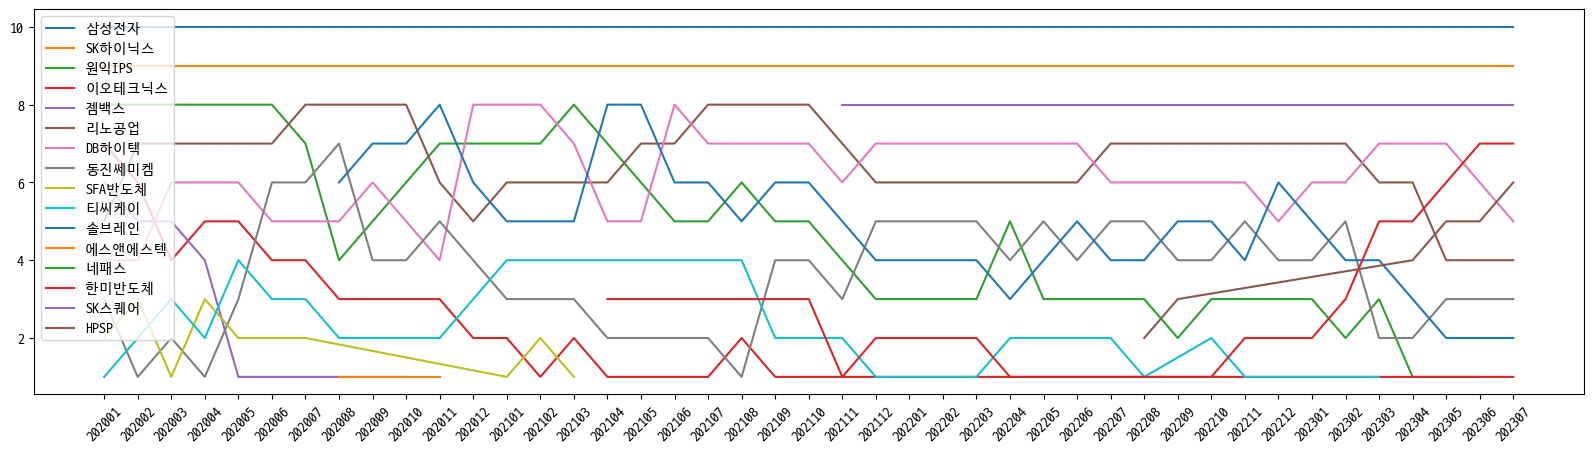

In [105]:
show_df(df_graph)

## 2차전지
- 에코프로비엠, LG에너지솔루션, 포스코케미칼

In [106]:
df_corps[df_corps['corp_name'] == '에코프로비엠']

,corp_code,corp_name,stock_code,corp_cls,corp_cls_nm,sector,product,industry_wics_ss_nm,industry_wics_ss_cd,industry_wics_ms_cd,industry_wics_ms_nm,industry_wics_ls_cd,industry_wics_ls_nm
1402,1160363,에코프로비엠,247540,K,kosdaq,일차전지 및 축전지 제조업,양극활물질,전기제품,453520,4535,전자와 전기제품,45,IT


In [107]:
df_corps[df_corps['corp_name'] == 'LG에너지솔루션']

,corp_code,corp_name,stock_code,corp_cls,corp_cls_nm,sector,product,industry_wics_ss_nm,industry_wics_ss_cd,industry_wics_ms_cd,industry_wics_ms_nm,industry_wics_ls_cd,industry_wics_ls_nm
1564,1515323,LG에너지솔루션,373220,Y,kospi,일차전지 및 축전지 제조업,"2차전지 (소형,ESS,자동차전지)",전기제품,453520,4535,전자와 전기제품,45,IT


In [108]:
df_corps[df_corps['corp_name'] == '포스코퓨처엠']

,corp_code,corp_name,stock_code,corp_cls,corp_cls_nm,sector,product,industry_wics_ss_nm,industry_wics_ss_cd,industry_wics_ms_cd,industry_wics_ms_nm,industry_wics_ls_cd,industry_wics_ls_nm
2326,155276,포스코퓨처엠,003670,Y,kospi,일차전지 및 축전지 제조업,"내화물, 생석회, 음극재 및 양극재",화학,151010,1510,소재,15,소재


In [109]:
df_graph = get_df('일차전지 및 축전지 제조업', is_wics=False)
df_graph['corp_name'].unique()

array(['삼성SDI', '포스코퓨처엠', '에코프로비엠', '엘앤에프', '세방전지', '비츠로셀', 'DN오토모티브',
       '신흥에스이씨', '에이에프더블류', '상신이디피', '비나텍', 'SK아이이테크놀로지', 'LG에너지솔루션',
       '더블유씨피', '탑머티리얼'], dtype=object)

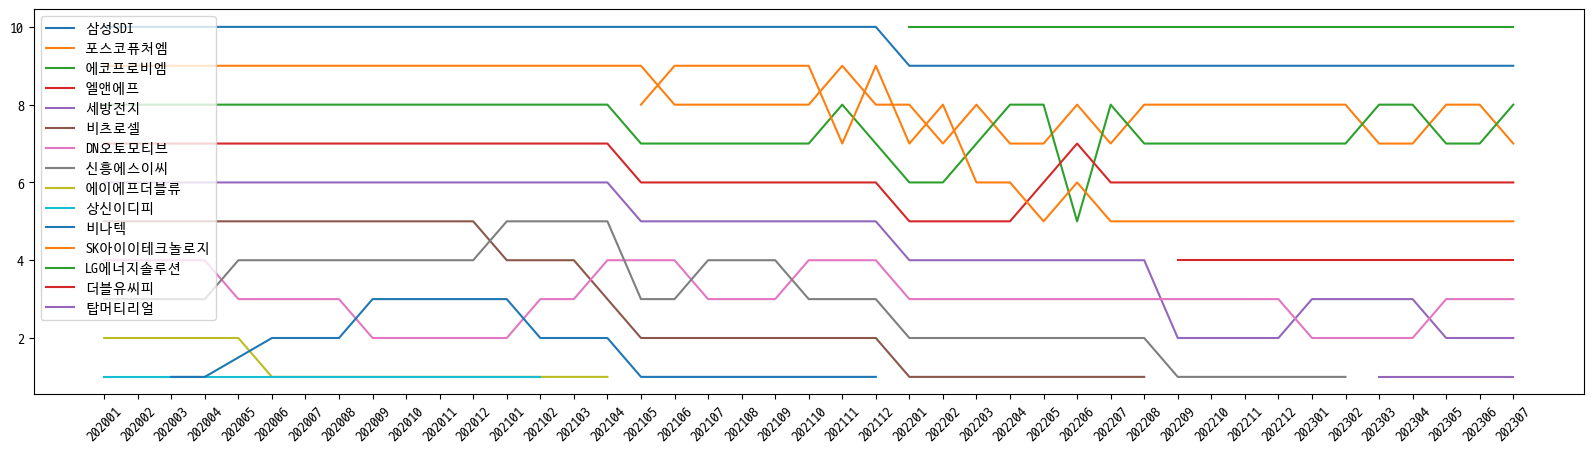

In [110]:
show_df(df_graph)

## 바이오 
- 삼성바이오로직스, 셀트리온, 유한양행, 녹십자

In [111]:
df_corps[df_corps['corp_name'] == '삼성바이오로직스']

,corp_code,corp_name,stock_code,corp_cls,corp_cls_nm,sector,product,industry_wics_ss_nm,industry_wics_ss_cd,industry_wics_ms_cd,industry_wics_ms_nm,industry_wics_ls_cd,industry_wics_ls_nm
1558,877059,삼성바이오로직스,207940,Y,kospi,기초 의약물질 및 생물학적 제제 제조업,바이오의약품,제약,352020,3520,제약과생물공학,35,건강관리


In [112]:
df_corps[df_corps['corp_name'] == '셀트리온']

,corp_code,corp_name,stock_code,corp_cls,corp_cls_nm,sector,product,industry_wics_ss_nm,industry_wics_ss_cd,industry_wics_ms_cd,industry_wics_ms_nm,industry_wics_ls_cd,industry_wics_ls_nm
1272,413046,셀트리온,068270,Y,kospi,기초 의약물질 및 생물학적 제제 제조업,"램시마, 트룩시마, 허쥬마",제약,352020,3520,제약과생물공학,35,건강관리


In [113]:
df_corps[df_corps['corp_name'] == '유한양행']

,corp_code,corp_name,stock_code,corp_cls,corp_cls_nm,sector,product,industry_wics_ss_nm,industry_wics_ss_cd,industry_wics_ms_cd,industry_wics_ms_nm,industry_wics_ls_cd,industry_wics_ls_nm
1300,145109,유한양행,000100,Y,kospi,의약품 제조업,"의약품(삐콤씨, 안티푸라민, 렉라자, 로수바미브, 코푸시럽 등), 생활용품(유한락스...",제약,352020,3520,제약과생물공학,35,건강관리


In [114]:
df_corps[df_corps['corp_name'] == '녹십자']

,corp_code,corp_name,stock_code,corp_cls,corp_cls_nm,sector,product,industry_wics_ss_nm,industry_wics_ss_cd,industry_wics_ms_cd,industry_wics_ms_nm,industry_wics_ls_cd,industry_wics_ls_nm
1411,129679,녹십자,006280,Y,kospi,의약품 제조업,"알부민외 제조,판매",제약,352020,3520,제약과생물공학,35,건강관리


In [115]:
df_graph = get_df('제약', is_wics=True)
df_graph['corp_name'].unique()

array(['삼성바이오로직스', '셀트리온', '셀트리온헬스케어', 'HLB', '한미약품', '유한양행', '한미사이언스',
       '녹십자', '셀트리온제약', '대웅제약', '코미팜', '부광약품', '에스케이바이오팜', '신풍제약',
       'SK바이오사이언스'], dtype=object)

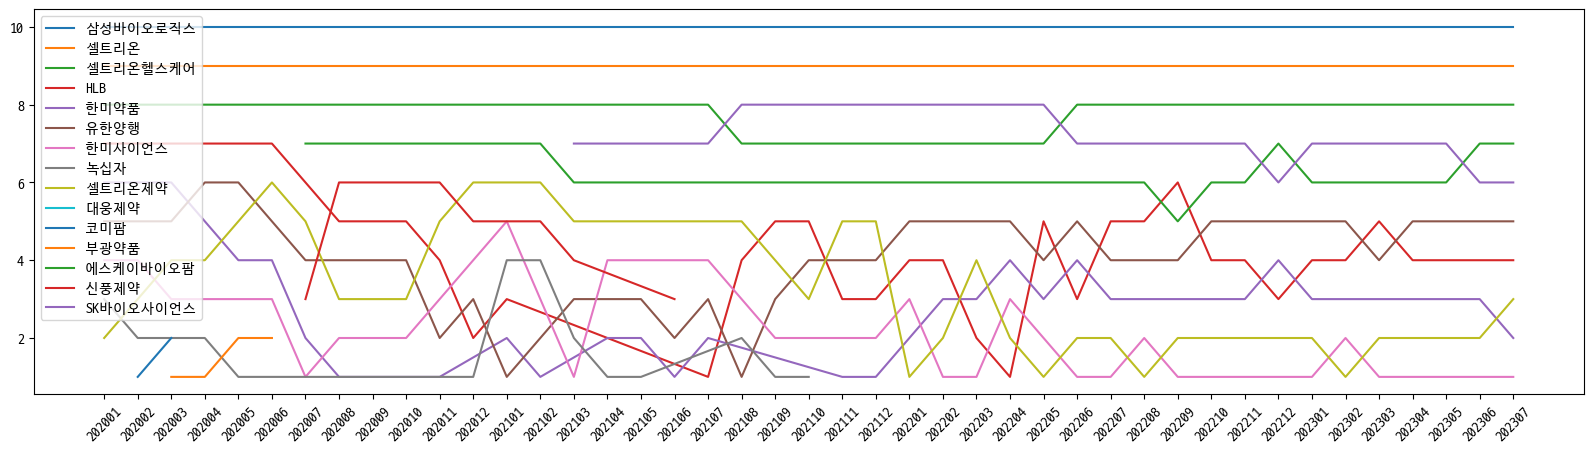

In [116]:
show_df(df_graph)

## 로봇

In [127]:
df_corps[df_corps['corp_name'] == '로보티즈']

,corp_code,corp_name,stock_code,corp_cls,corp_cls_nm,sector,product,industry_wics_ss_nm,industry_wics_ss_cd,industry_wics_ms_cd,industry_wics_ms_nm,industry_wics_ls_cd,industry_wics_ls_nm
152,946030,로보티즈,108490,K,kosdaq,특수 목적용 기계 제조업,"솔루션(로봇 엑츄에이터 모듈과 구동 소프트웨어), 에듀테인먼트 로봇, 로봇 플랫폼",기계,201060,2010,자본재,20,산업재


In [131]:
df_corps[df_corps['corp_name'] == '레인보우로보틱스']

,corp_code,corp_name,stock_code,corp_cls,corp_cls_nm,sector,product,industry_wics_ss_nm,industry_wics_ss_cd,industry_wics_ms_cd,industry_wics_ms_nm,industry_wics_ls_cd,industry_wics_ls_nm
1156,1261644,레인보우로보틱스,277810,K,kosdaq,특수 목적용 기계 제조업,"협동로봇, 천문마운트시스템, 이족보행로봇 등",기계,201060,2010,자본재,20,산업재


In [130]:
df_corps[df_corps['corp_name'] == '유진로봇']

,corp_code,corp_name,stock_code,corp_cls,corp_cls_nm,sector,product,industry_wics_ss_nm,industry_wics_ss_cd,industry_wics_ms_cd,industry_wics_ms_nm,industry_wics_ls_cd,industry_wics_ls_nm
1102,234227,유진로봇,056080,K,kosdaq,특수 목적용 기계 제조업,"청소로봇, 완구류외",기계,201060,2010,자본재,20,산업재


In [132]:
df_graph = get_df('특수 목적용 기계 제조업', is_wics=False)
df_graph['corp_name'].unique()

array(['두산밥캣', '원익IPS', '에스에프에이', '이오테크닉스', '고영', '젬백스', 'HD현대인프라코어',
       '한미반도체', '테스', 'AP시스템', '유진테크', '톱텍', '피엔티', '에이비프로바이오', '피에스케이',
       '씨아이에스', '주성엔지니어링', '코미코', 'HPSP', '레인보우로보틱스', '윤성에프앤씨'],
      dtype=object)

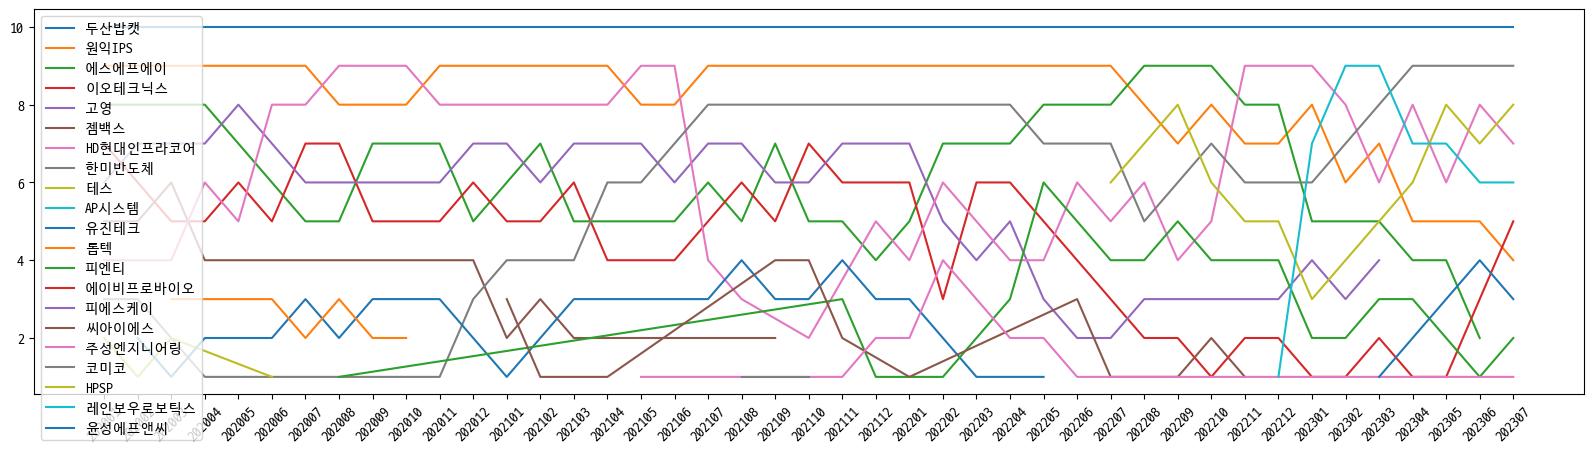

In [133]:
show_df(df_graph)